# Install packages and set up Neo4J environment

In [36]:
# pip install --upgrade --quiet  langchain langchain-community langchain-openai langchain-experimental neo4j
#!pip install pydantic==1.10.10

In [1]:
import langchain_experimental.graph_transformers.llm
print(langchain_experimental.graph_transformers.llm.__file__)

/Users/shrutisrinivasan/anaconda3/lib/python3.11/site-packages/langchain_experimental/graph_transformers/llm.py


In [64]:
import getpass
import os
import pandas as pd
import csv
import re

import networkx as nx
import matplotlib.pyplot as plt

from langchain_community.graphs import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer

from langchain.chains import GraphCypherQAChain
from langchain_openai import ChatOpenAI
from langchain_core.documents import Document

os.environ["OPENAI_API_KEY"] = getpass.getpass()

In [65]:
from openai import OpenAI

client = OpenAI()

In [66]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate
from langchain_core.prompts import SystemMessagePromptTemplate
from langchain_core.prompts import HumanMessagePromptTemplate

In [67]:
from langchain_community.document_loaders import WikipediaLoader
# !pip install --upgrade --quiet  langchain langchain-experimental langchain-openai neo4j wikipedia

In [4]:
# from neo4j import GraphDatabase
# driver = GraphDatabase.driver("bolt://localhost:7687", auth=("",""))

## Set up local Neo4J environment

### How to set up local Neo4J environment 

Link to installation directions: https://neo4j.com/docs/operations-manual/current/installation/osx/, follow instructions under 'Unix console application" 
This is for macOS users

1. Install OpenJDK 17 or Oracle 17 here: https://download.oracle.com/java/17/latest/jdk-17_linux-aarch64_bin.tar.gz (sha256), you will need to unpack this file

2. Download Neo4j here: https://neo4j.com/deployment-center/

    1. Go to <font color="pink">Graph Database Self-Managed</font>

    2. Click the <font color="pink">Community</font> tab

    3. There should be two dropdown menus
        - In the first dropdown menu, select the latest version of Neo4j (right now, it should be 5.18.1)
        - In the second dropdown menu, select 'Linux/Mac Executable <font color="red">*Neo4j version (5.18.1) (tar)*</font>, this should be a tarball file

    4. Unpack this tarball file in a separate local folder on your laptop --> I recommend saving this folder on your Desktop 
        - Use this command to unpack this file in your terminal in your local folder: <font color="red">tar -xf neo4j-community-5.18.1-unix.tar.gz</font>

    5. Rename the unpacked folder <font color="green">NEO4J_HOME</font>

3. Start Neo4j console

    1. In your terminal, go to <font color="green">NEO4J_HOME</font>

    2. You will run Neo4j as a console application --> in your <font color="green">NEO4J_HOME</font> directory, type this in your command line to start the Neo4j console <font color="yellow">bin/neo4j console</font>

4. Go to http://localhost:7474 in a web browser

5. Connect using the username <font color="green">neo4j</font> with the default password <font color="green">neo4j</font> . You will then be prompted to create a new password.

    - Copy your new password as you will need to paste in the code chunk below in <font color="yellow">*os.environ["NEO4J_PASSWORD"] = paste your new password here*</font>
    
    - Stop the server by typing Ctrl-C in the console.

6. Click on to your <font color="green">NEO4J_HOME</font> folder in Finder

    1. Go to <font color="orange">*labs*</font> folder

    2. Copy the <font color="red">*apoc-5.18.0-core.jar*</font> file

    3. Go to <font color="orange">*plugins*</font> folder in <font color="green">NEO4J_HOME</font> 

    4. Paste the <font color="red">*apoc-5.18.0-core.jar*</font> in the <font color="orange">*plugins*</font> folder

    5. In your <font color="green">NEO4J_HOME</font> folder, go to the <font color="orange">*conf*</font> folder

        1. Click on <font color="yellow">*neo4j.conf*</font> file

        2. You will have to modify two lines this file: 

            - Find the line with <font color="lightgreen">dbms.security.procedures.unrestricted=algo.*</font>, this should be line 239
                - uncomment this line
                - add <font color="red">apoc.\*</font> to this line of code --> <font color="lightgreen">dbms.security.procedures.unrestricted=algo.*,apoc.\*</font>

            - Find the line with <font color="lightgreen">dbms.security.procedures.allowlist=apoc.coll.\*,apoc.load.\*,gds.*</font>, this should be line 243
                - uncomment this line
                - add <font color="red">apoc.\*</font> to this line of code --> <font color="lightgreen">dbms.security.procedures.allowlist=apoc.coll.\*,apoc.load.\*,gds.*,apoc.\*</font>

            - Save this file

7. Restart the <font color="green">NEO4J</font> console









In [68]:
# Need your own neo4j account --> personal username and password
os.environ["NEO4J_URI"] = "bolt://localhost:7689"
os.environ["NEO4J_USERNAME"] = ""
os.environ["NEO4J_PASSWORD"] = ""

graph = Neo4jGraph()

In [69]:
# graph.refresh_schema()
print(graph.schema)

Node properties are the following:
Step {id: STRING},Tool {id: STRING},Video_number {id: STRING}
Relationship properties are the following:

The relationships are the following:
(:Step)-[:NEXT_STEP]->(:Step),(:Step)-[:TOOL_REQUIRED_FOR_STEP]->(:Tool),(:Video_number)-[:CORRESPONDING_VIDEO]->(:Step)


# LLM Definition/Version

In [70]:
# LLM version used in LangChain --> GPT4
# insert your own OpenAI API Key here
llm = ChatOpenAI(openai_api_key= "", temperature=0, model_name="gpt-4-0125-preview")
llm_transformer = LLMGraphTransformer(llm=llm)

# ALL TRANSCRIPTS

ValidationError: 22 validation errors for DynamicGraph
relationships -> 0 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 0 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 1 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 1 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 2 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 2 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 3 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 3 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 4 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 4 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 5 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 5 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 6 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 6 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 7 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 7 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 8 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 8 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 9 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 9 -> target
  value is not a valid dict (type=type_error.dict)
relationships -> 10 -> source
  value is not a valid dict (type=type_error.dict)
relationships -> 10 -> target
  value is not a valid dict (type=type_error.dict)

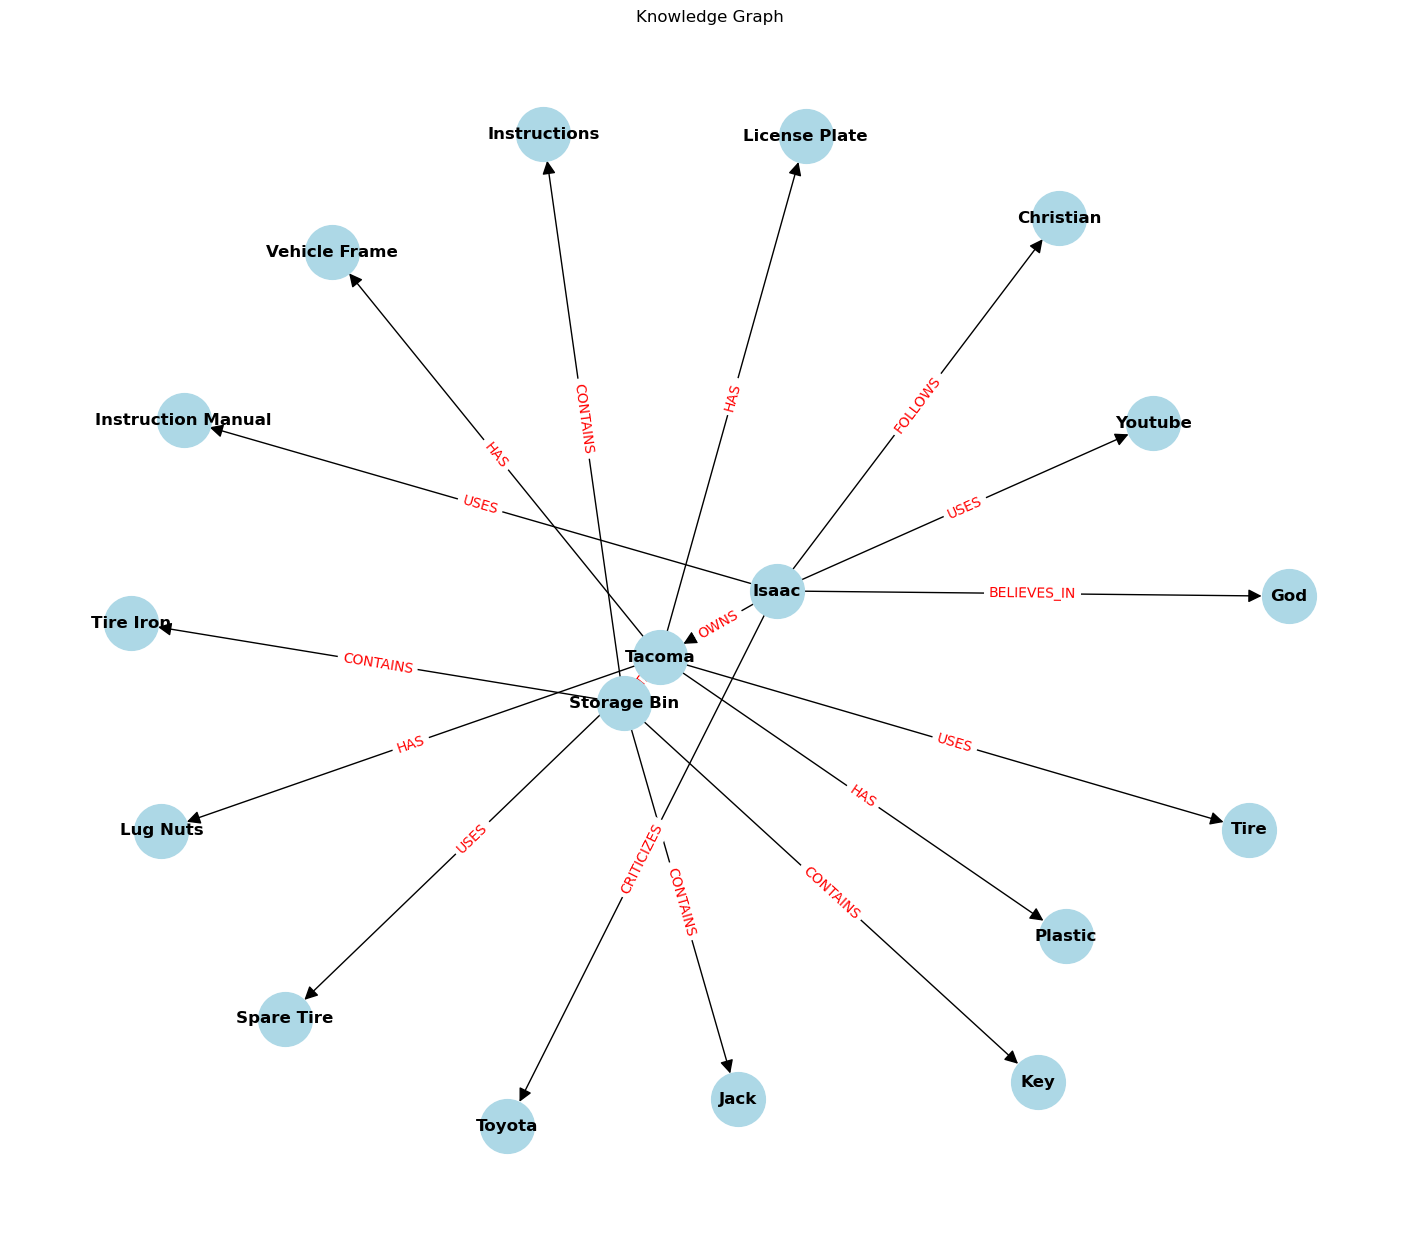

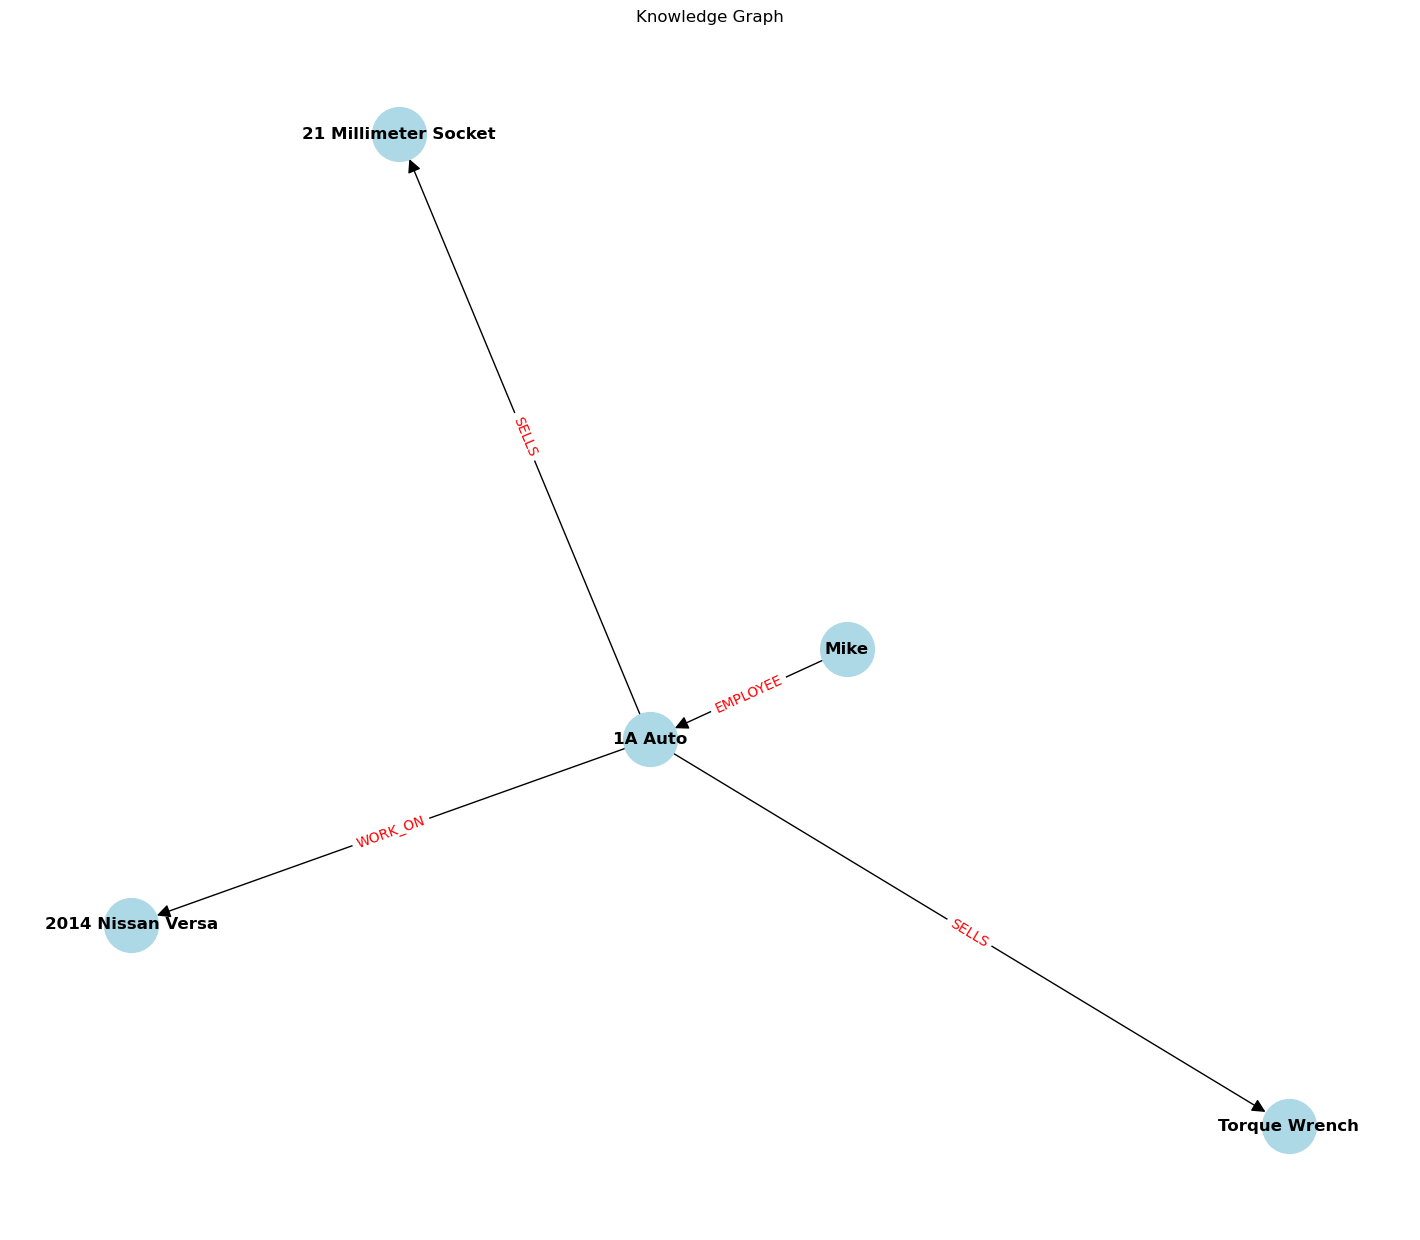

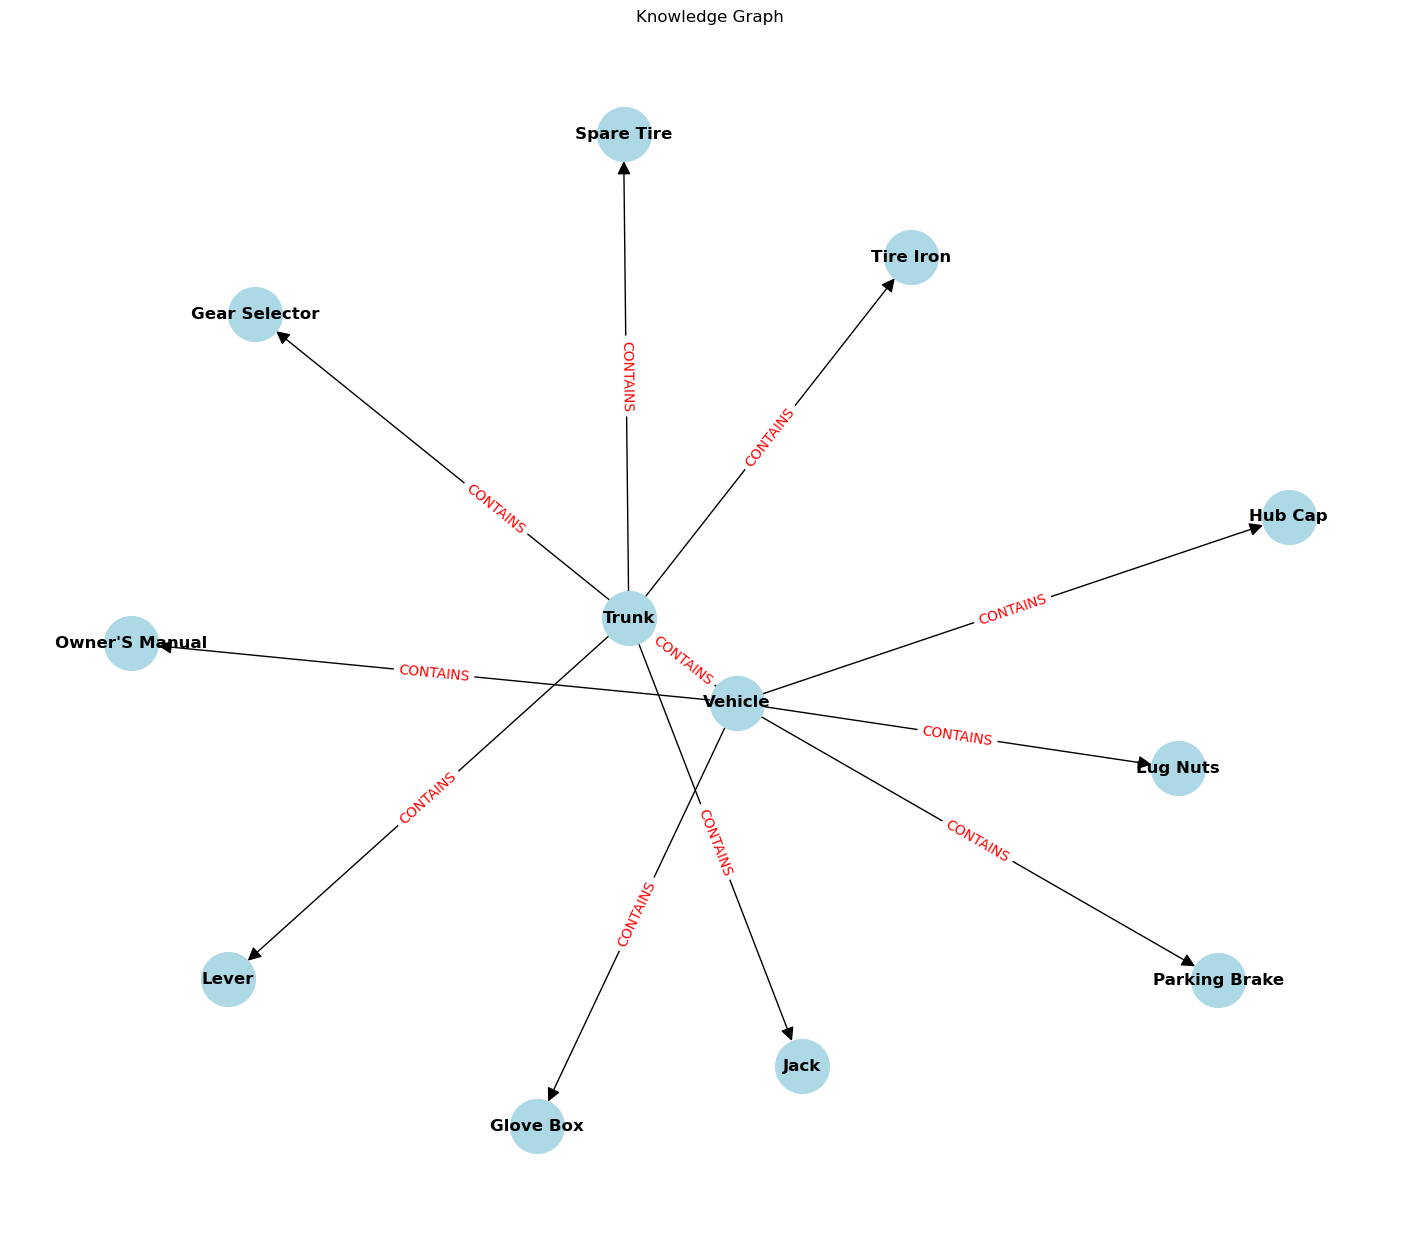

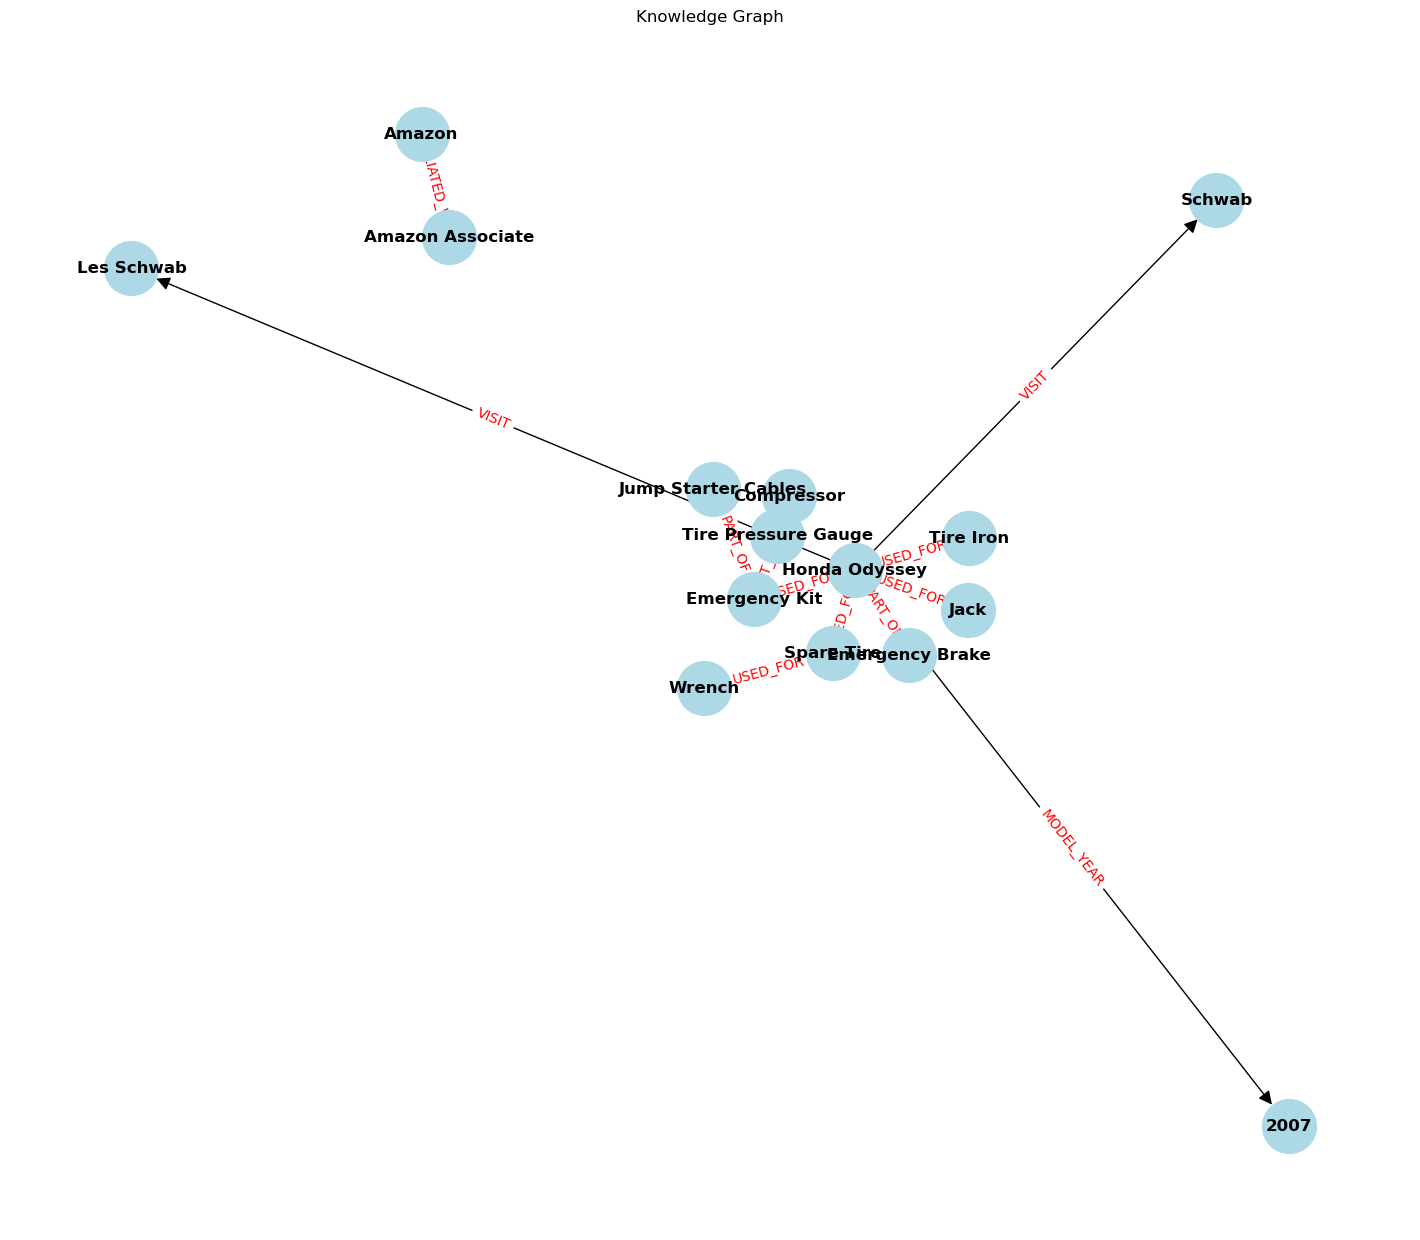

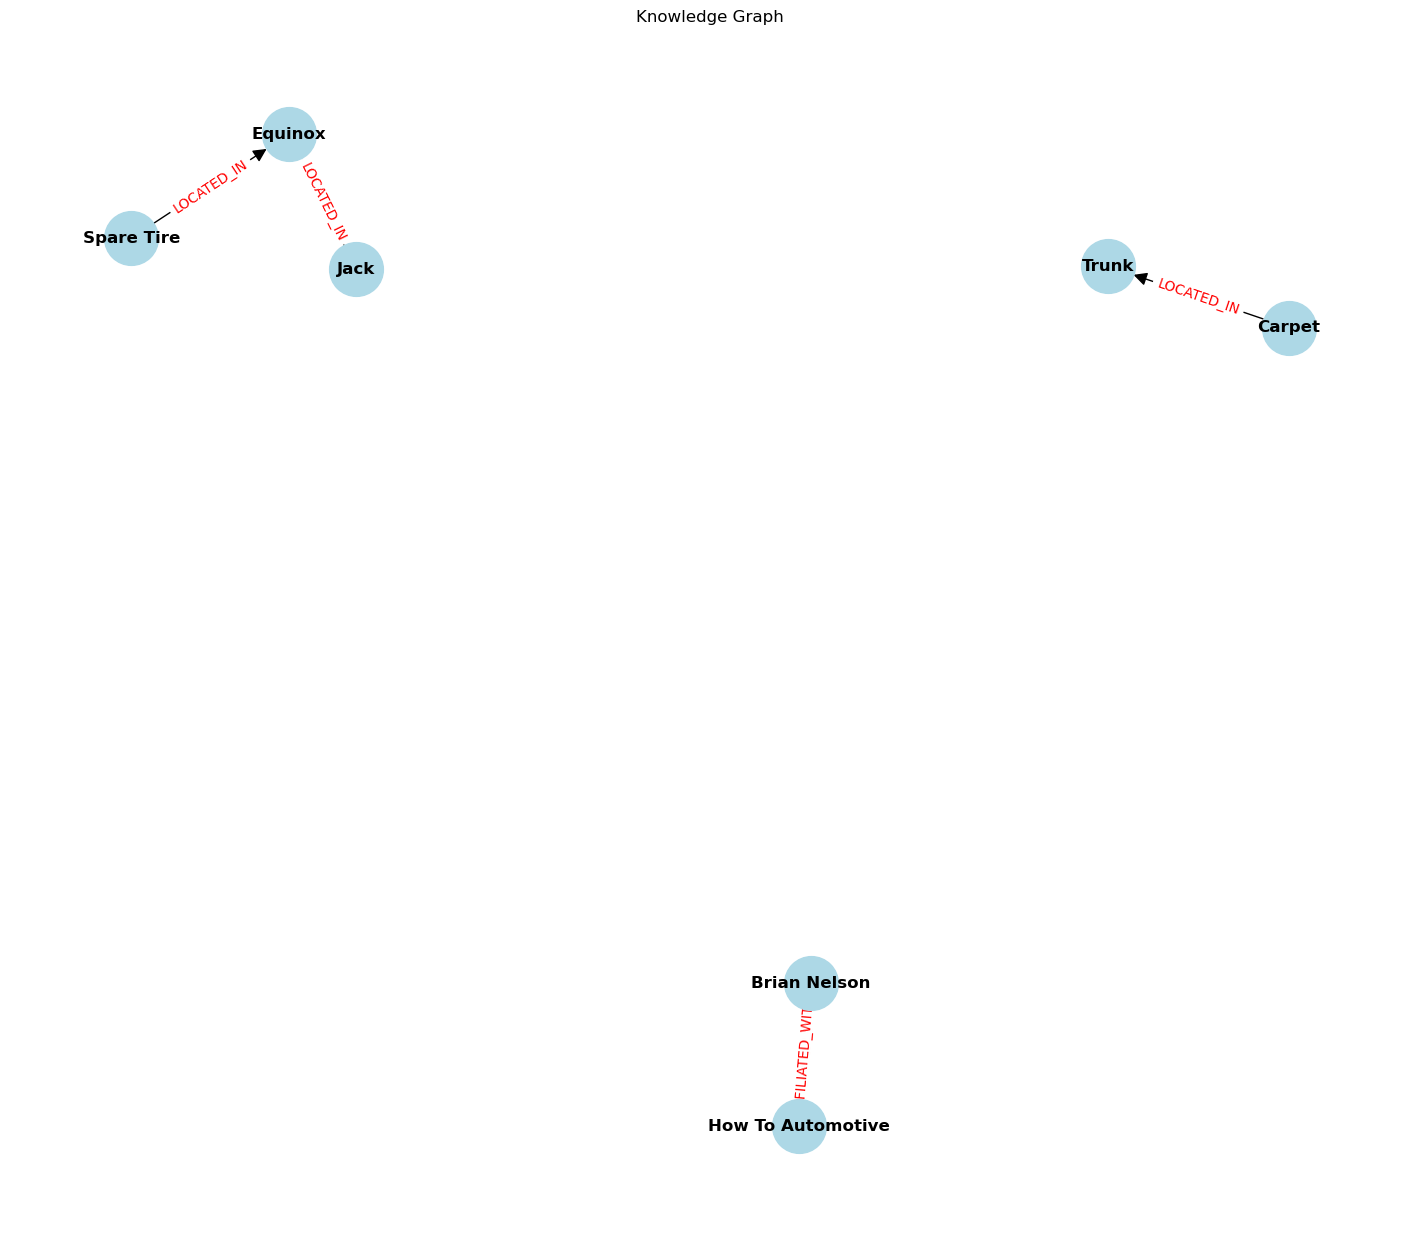

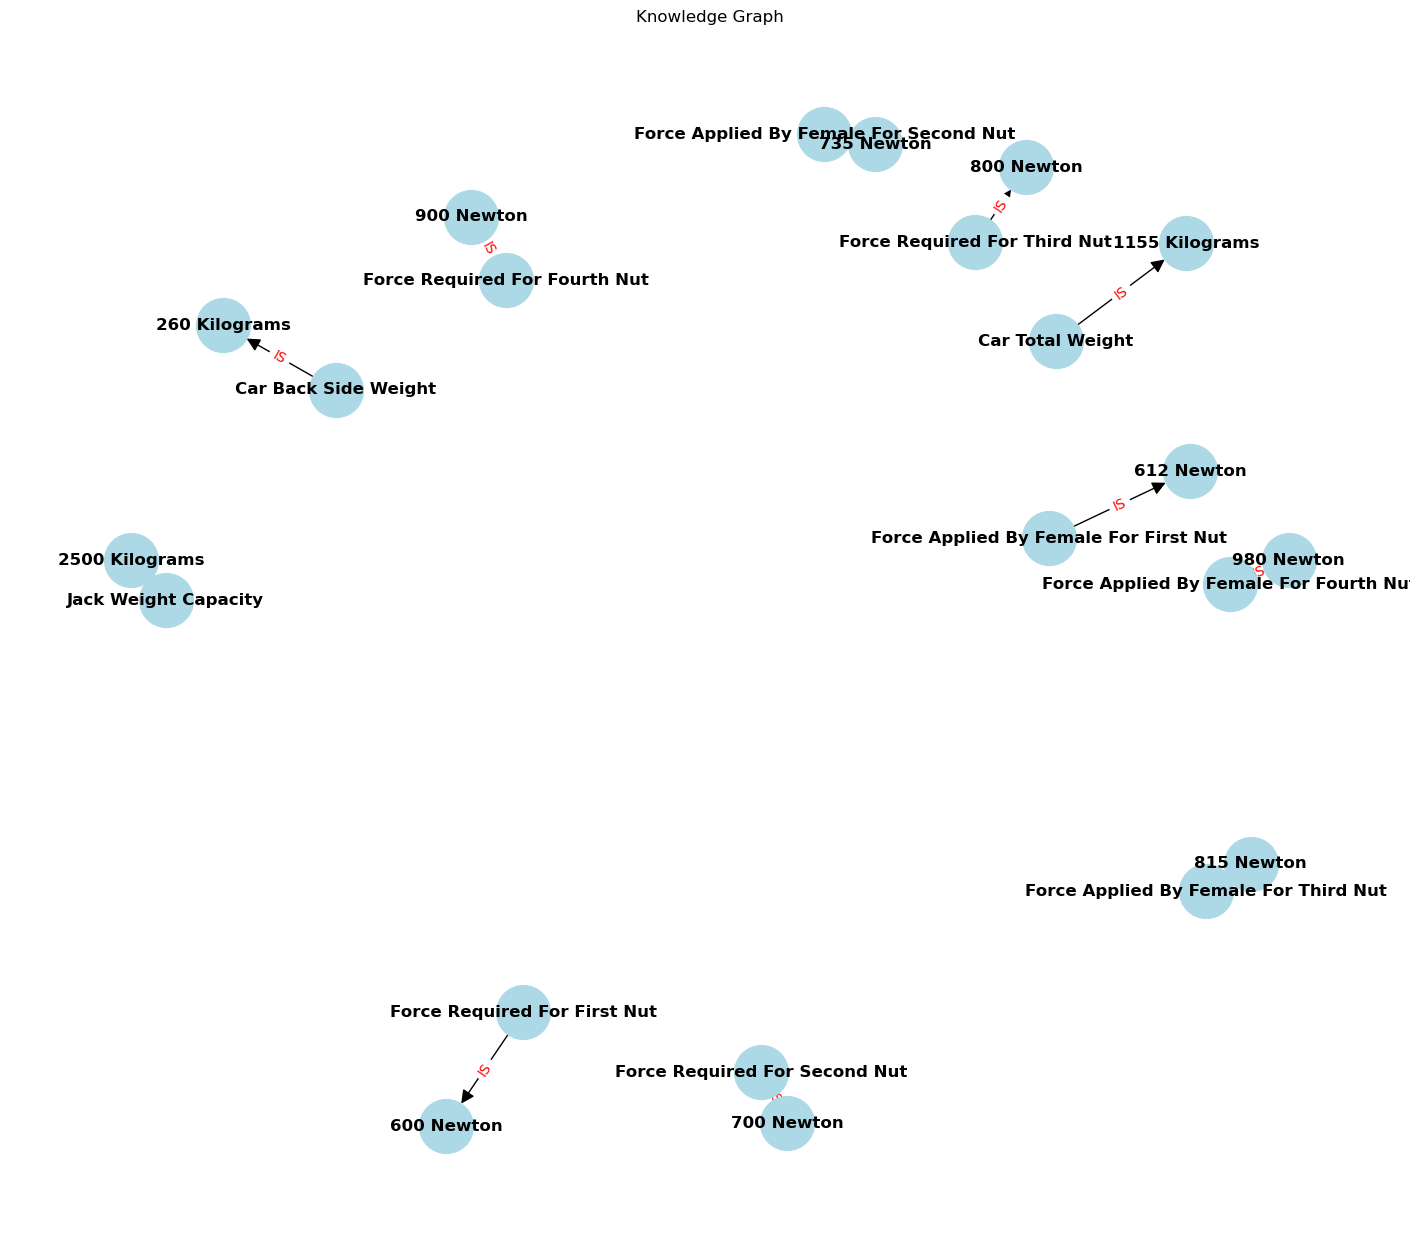

In [ ]:
## comments marked with double pound signs requires directory path replacement

## directory of transcript files --> replace with your own path to folder of video transcripts
transcript_directory = ""

# loop through each video transcript in folder
for filename in os.scandir(transcript_directory):
    # For mac users, .DS_Store is hidden, want to make sure this file is skipped when looping through video transcripts in a folder
    if filename.is_file():
        if os.path.basename(filename) == '.DS_Store':
            continue
        # the code below applies to video transcript files only 
        else:
            # open and read video transcript
            with open(filename, newline='', encoding='utf-8') as f:
                reader = csv.reader(f)
                # reads each element in a video transcript as an element in a list
                data = list(reader)
            # formats transcript into a string input
            data_flat = [item for sublist in data for item in sublist]
            inp = ' '.join([str(elem) for elem in data_flat])

            # format text into document format
            documents = [Document(page_content=inp)]

            # Converting text document into structured graph documents by leveraging LLM to parse and categorize entities and their relationships
            graph_documents = llm_transformer.convert_to_graph_documents(documents)

            # Append extracted relationships between each node in a list
            graph_info_list = graph_documents[0].relationships

            # Extracted head node IDs will be appended to this list
            source_graph_list = []
            # Extracted tail node IDs will be appended to this list
            target_graph_list = []
            # Extracted relationship type between head and tail nodes will be appended to this list
            type_graph_list = []

            # Fill in each list
            for item in graph_info_list:
                source_graph_list.append(item.source.id)
                target_graph_list.append(item.target.id)
                type_graph_list.append(item.type)

            # create datafrane with nodes and relationships
            df = pd.DataFrame({'source': source_graph_list, 'target': target_graph_list, 'type': type_graph_list})


            # Create a directed graph
            knowledge_graph = nx.DiGraph()

            # Add nodes and edges from the DataFrame
            for _, row in df.iterrows():
                knowledge_graph.add_edge(row['source'], row['target'], relationship=row['type'])

            # Visualize the graph
            plt.figure(figsize=(16, 12))
            pos = nx.spring_layout(knowledge_graph)
            nx.draw(knowledge_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=1500, arrowsize=20)

            # Draw edge labels aligned with the edges
            edge_labels = {(source, target): relationship for source, target, relationship in knowledge_graph.edges(data='relationship')}
            nx.draw_networkx_edge_labels(knowledge_graph, pos=pos, edge_labels=edge_labels, label_pos=0.5, font_size=10, font_color='red')

            plt.title("Knowledge Graph")

            # extracts video number from filename to label a result output file for each video transcript
            temp = re.findall(r'\d+', str(filename))
            res = list(map(int, temp))

            # save image to output file
            plt.savefig(f'')

# Load in media (video transcripts) input

In [78]:
# Loading in a raw video transcript and formatting it as an nlp input
filename = '/Users/shrutisrinivasan/Desktop/HCI Code/tire_chain_transcripts/video_11_transcript.csv'
# You should have a folder of transcripts of the bike chain repair video and load one of them here, replace the directory with your won 
with open(filename, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

# Re-formats transcript into unstructure string
data_flat = [item for sublist in data for item in sublist]
inp = ' '.join([str(elem) for elem in data_flat])
text_inp = f'filename: {filename}\n{inp}'
print(text_inp)

filename: /Users/shrutisrinivasan/Desktop/HCI Code/tire_chain_transcripts/video_11_transcript.csv
﻿0:01 good afternoon everybody this is jason 0:02 over at world volkswagen and this is 0:04 eddie 0:05 this is our 2013 volkswagen jet sea 0:09 uh so today we're going to go over how 0:11 to change the tire 0:12 so the first thing you want to do is 0:14 pull over to a safe location 0:16 or if you're in your driveway at home 0:18 that's fine you're going to want to put 0:19 it in park and pull up the emergency 0:21 brake 0:22 then the next thing you want going to 0:24 want to do is open the trunk 0:29 in the trunk 0:30 you're gonna move all your stuff out of 0:32 the way 0:34 and you're gonna lift up the cargo mat 0:36 if you have one 0:37 and then you're gonna reach right here 0:39 and under here it's gonna be your spare 0:41 tire your jack and all your tools so 0:44 we're going to take those out and meet 0:46 by this tire 0:47 and a couple minutes 0:50 okay so here we are with our jetta a

# Knowledge Graph Node and Relationship Extraction

In [79]:
# format text into document format
documents = [Document(page_content=text_inp)]
documents

[Document(page_content="filename: /Users/shrutisrinivasan/Desktop/HCI Code/tire_chain_transcripts/video_11_transcript.csv\n\ufeff0:01 good afternoon everybody this is jason 0:02 over at world volkswagen and this is 0:04 eddie 0:05 this is our 2013 volkswagen jet sea 0:09 uh so today we're going to go over how 0:11 to change the tire 0:12 so the first thing you want to do is 0:14 pull over to a safe location 0:16 or if you're in your driveway at home 0:18 that's fine you're going to want to put 0:19 it in park and pull up the emergency 0:21 brake 0:22 then the next thing you want going to 0:24 want to do is open the trunk 0:29 in the trunk 0:30 you're gonna move all your stuff out of 0:32 the way 0:34 and you're gonna lift up the cargo mat 0:36 if you have one 0:37 and then you're gonna reach right here 0:39 and under here it's gonna be your spare 0:41 tire your jack and all your tools so 0:44 we're going to take those out and meet 0:46 by this tire 0:47 and a couple minutes 0:50 okay s

In [81]:
# Class definition of a Node
class Node:
    def __init__(self, id, type, self_context):
        self.id = id
        self.type = type
        self.step_context = self_context

# Class definition of a Relationship
class Relationship:
    def __init__(self, source, target, type):
        self.source = source
        self.target = target
        self.type = type
        # self.importance = importance

## LLM-interpreted Nodes and Relationships

In [82]:
# Converting text document into structured graph documents by leveraging LLM to parse and categorize entities and their relationships
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Print extracted nodes and relationships between each node
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[Node(id='Jason', type='Person'), Node(id='Eddie', type='Person'), Node(id='World Volkswagen', type='Organization'), Node(id='2013 Volkswagen Jetta', type='Vehicle'), Node(id='Spare Tire', type='Object'), Node(id='Jack Stand', type='Object'), Node(id='Tool To Move Jack', type='Object'), Node(id='Wheel Lock', type='Object'), Node(id='Lug Nut Wrench', type='Object'), Node(id='Pin To Take Plastic Caps Off', type='Object'), Node(id='Plastic Cap Tool', type='Object'), Node(id='Lug Nut', type='Object')]
Relationships:[Relationship(source=Node(id='Jason', type='Person'), target=Node(id='World Volkswagen', type='Organization'), type='AFFILIATED_WITH'), Relationship(source=Node(id='Eddie', type='Person'), target=Node(id='World Volkswagen', type='Organization'), type='AFFILIATED_WITH'), Relationship(source=Node(id='Jason', type='Person'), target=Node(id='2013 Volkswagen Jetta', type='Vehicle'), type='PRESENTS'), Relationship(source=Node(id='Eddie', type='Person'), target=Node(id='2013 Volk

In [53]:
graph_documents

[GraphDocument(nodes=[Node(id='Chalking The Wheels', type='Activity'), Node(id='Loosening Lug Nuts', type='Activity'), Node(id='Raising The Jack', type='Activity'), Node(id='Taking The Wheel Off', type='Activity'), Node(id='Lowering The Car', type='Activity'), Node(id='Tightening Lug Nuts', type='Activity'), Node(id='Putting The Hubcap Back On', type='Activity'), Node(id='Filling Up With Air', type='Activity'), Node(id='Person', type='Person')], relationships=[Relationship(source=Node(id='Person', type='Person'), target=Node(id='Chalking The Wheels', type='Activity'), type='DOES'), Relationship(source=Node(id='Person', type='Person'), target=Node(id='Loosening Lug Nuts', type='Activity'), type='DOES'), Relationship(source=Node(id='Person', type='Person'), target=Node(id='Raising The Jack', type='Activity'), type='DOES'), Relationship(source=Node(id='Person', type='Person'), target=Node(id='Taking The Wheel Off', type='Activity'), type='DOES'), Relationship(source=Node(id='Person', type

## Self-define Nodes and Relationship Extraction

### Define Nodes and relationships here

In [124]:
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     # allowed_nodes=node_attributes,
#     allowed_nodes=["Step", "Tool", "Video_number"],
#     # allowed_relationships=relationship_attributes
#     allowed_relationships=["NEXT_STEP", "TOOL_REQUIRED_FOR_STEP", "CORRESPONDING_VIDEO"]
# )

# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
#     documents
# )

# print(f"Nodes:{graph_documents_filtered[0].nodes}")
# print(f"Relationships:{graph_documents_filtered[0].relationships}")

Nodes:[Node(id='Engage Emergency Brake', type='Step'), Node(id='Locate Spare Wheel And Tools', type='Step'), Node(id='Remove Spare Tire', type='Step'), Node(id='Jack Up Vehicle', type='Step'), Node(id='Loosen Lug Nuts', type='Step'), Node(id='Raise Vehicle Off Ground', type='Step'), Node(id='Remove Lug Nuts', type='Step'), Node(id='Place Space-Saving Tire', type='Step'), Node(id='Tighten Lug Nuts In Star Shape', type='Step'), Node(id='Lower Vehicle Onto Road', type='Step'), Node(id='Emergency Brake', type='Tool'), Node(id='Spare Wheel', type='Tool'), Node(id='Tools', type='Tool'), Node(id='Jack', type='Tool'), Node(id='Wheel Wrench', type='Tool'), Node(id='Extension Bar', type='Tool'), Node(id='Lug Nuts', type='Tool'), Node(id='Video 49', type='Video_number')]
Relationships:[Relationship(source=Node(id='Engage Emergency Brake', type='Step'), target=Node(id='Emergency Brake', type='Tool'), type='TOOL_REQUIRED_FOR_STEP'), Relationship(source=Node(id='Locate Spare Wheel And Tools', type='

Failed to write data to connection IPv4Address(('localhost', 7689)) (ResolvedIPv4Address(('127.0.0.1', 7689)))


In [83]:
# Self-define nodes and relationships --> instructing LLM to extract defined nodes and relationships
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    # allowed_nodes=node_attributes,
    allowed_nodes=["Step", "Tool", "Video_number"],
    # allowed_relationships=relationship_attributes
    allowed_relationships=["NEXT_STEP", "TOOL_REQUIRED_FOR_STEP", "CORRESPONDING_VIDEO"],
    prompt = ChatPromptTemplate(
        input_variables=['input'],
        messages=[
            SystemMessagePromptTemplate(
                prompt=PromptTemplate(
                    input_variables=['input'],
                    # Here we can experiment with creating instructions on how to extract nodes
                    template="""
        # Knowledge Graph Instructions for GPT-4
        ## Overview
        - You are designed to extract information in structured formats to build a knowledge graph from the given text on a procedure in.
        - Capture as much relevant information as possible without sacrificing accuracy.

        ## Labeling Nodes
        - Use these labels to identify nodes (e.g., 'Video_number' for the video label from the filename at the beginning of the text input, 'Step' for any description on conducting a task step, 'Tool' for any tool used for a task step).
        - Do not use integers as node IDs. Use names or human-readable identifiers.
        - Identify as many nodes as possible

        ## Relationships
        - Use descriptive relationship types (e.g. 'CORRESPONDING_VIDEO" to identify the specific video to the first step in the text input, 'NEXT_STEP' to identify order of steps, 'TOOL_REQUIRED_FOR_STEP' to identify specific tools used for a step)
        - Identify as many relationships as possible

        ## Coreference Resolution
        - Maintain entity consistency across the knowledge graph.

        ## Strict Compliance
        - Follow these instructions closely to ensure the accuracy and coherence of the knowledge graph.
                        """
                )
            ),
            HumanMessagePromptTemplate(
                prompt=PromptTemplate(
                    input_variables=['input'],
                    # Here we can experiment with prompt engineering, what prompt will accurately extract these nodes and relationships? 
                    template="Extract and structure the information following the above guidelines from the following input: {input}. Identify order of steps and tools used for each step"
                )
            )
        ],
        strict_mode=True
    )
)

# graph_documents_filtered = llm_transformer_filtered.transform(
#     inp
# )
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
    documents
)

# for node_id, attrs in node_attributes.items():
#     if node_id in graph_documents_filtered[0].nodes:
#         graph_documents_filtered[0].nodes[node_id].update(attrs)

# # Assuming a method to apply relationship attributes exists
# for rel_id, attrs in relationship_attributes.items():
#     # This step depends on how your graph model represents relationships
#     relationship_key = (rel_id, attrs['type']) # Example key structure
#     if relationship_key in graph_documents_filtered[0].relationships:
#         graph_documents_filtered[0].relationships[relationship_key].update(attrs)


print(f"Nodes:{graph_documents_filtered[0].nodes}")
print(f"Relationships:{graph_documents_filtered[0].relationships}")
# for graph_doc in graph_documents_filtered:
#     print(f"Nodes: {graph_doc['nodes']}")
#     print(f"Relationships: {graph_doc['relationships']}")

Nodes:[Node(id='Video_11', type='Video_number'), Node(id='Pull_Over_To_A_Safe_Location', type='Step'), Node(id='Open_The_Trunk', type='Step'), Node(id='Move_Stuff_And_Lift_Cargo_Mat', type='Step'), Node(id='Take_Out_Spare_Tire_Jack_And_Tools', type='Step'), Node(id='Place_Jack_In_Location', type='Step'), Node(id='Jack_Up_The_Car', type='Step'), Node(id='Remove_Plastic_Caps', type='Step'), Node(id='Loosen_Lug_Nuts', type='Step'), Node(id='Use_Wheel_Lock_To_Remove_Locking_Lug_Nut', type='Step'), Node(id='Remove_Wheel', type='Step'), Node(id='Attach_Replacement_Wheel', type='Step'), Node(id='Hand_Tighten_Lug_Nuts', type='Step'), Node(id='Tighten_Lug_Nuts_In_Diagonal_Pattern', type='Step'), Node(id='Lower_The_Car', type='Step'), Node(id='Spare_Tire', type='Tool'), Node(id='Jack_Stand', type='Tool'), Node(id='Jack_Tool', type='Tool'), Node(id='Wheel_Lock', type='Tool'), Node(id='Lug_Nut_Wrench', type='Tool'), Node(id='Plastic_Cap_Tool', type='Tool')]
Relationships:[Relationship(source=Node(

In [84]:
# adding extracted nodes and relationships to local graph DB (database) in neo4j
graph.add_graph_documents(graph_documents_filtered)

In [ ]:
# node_attributes = {
#     "step" {
#         ['name', "starting timestamp", "ending timestamp", "step difficulty", "level of proficiency"]
#     }
# }

## Using Wikipedia loader

In [ ]:
query = "What are the steps to replace a flat tire on a car"
raw_documents = WikipediaLoader(query=query).load()

# Converting text document into structured graph documents by leveraging LLM to parse and categorize entities and their relationships
# graph_documents = llm_transformer.convert_to_graph_documents(raw_documents)

# Print extracted nodes and relationships between each node
# print(f"Nodes:{graph_documents[0].nodes}")
# print(f"Relationships:{graph_documents[0].relationships}")


In [ ]:
raw_documents

[Document(page_content="A flat tire (British English: flat tyre) is a deflated pneumatic tire, which can cause the rim of the wheel to ride on the tire tread or the ground potentially resulting in loss of control of the vehicle or irreparable damage to the tire. The most common cause of a flat tire is puncturing of the tire by a sharp object, such as a nail or pin, letting the air escape. Depending on the size of the puncture, the tire may deflate slowly or rapidly.\n\n\n== Other causes ==\nBesides puncturing of the tire a flat can be caused by: failure of or damage to the valve stem; a nail in the tire; rubbing of the tire against the road; ripping of the tire; separation of tire and rim by collision with another object; excessive wear of the tire tread allowing explosive tire failure or road debris tearing through the tire.\nSome tyres, particularly those with a slow leak, can be repaired and re-inflated; others, especially those with worn tread, must be replaced.\n\n\n== Driving or 

# Construcing the Knowledge Graph

In [56]:
# Append extracted relationships between each node in a list
# graph_info_list = graph_documents[0].relationships
graph_info_list = graph_documents_filtered[0].relationships
graph_info_list

[Relationship(source=Node(id='Pull Over To A Safe Location', type='Step'), target=Node(id='Put In Park And Pull Up Emergency Brake', type='Step'), type='NEXT_STEP'),
 Relationship(source=Node(id='Put In Park And Pull Up Emergency Brake', type='Step'), target=Node(id='Open The Trunk', type='Step'), type='NEXT_STEP'),
 Relationship(source=Node(id='Open The Trunk', type='Step'), target=Node(id='Move Stuff Out Of The Way', type='Step'), type='NEXT_STEP'),
 Relationship(source=Node(id='Move Stuff Out Of The Way', type='Step'), target=Node(id='Lift Up The Cargo Mat', type='Step'), type='NEXT_STEP'),
 Relationship(source=Node(id='Lift Up The Cargo Mat', type='Step'), target=Node(id='Take Out Spare Tire, Jack, And Tools', type='Step'), type='NEXT_STEP'),
 Relationship(source=Node(id='Take Out Spare Tire, Jack, And Tools', type='Step'), target=Node(id='Place Jack In Jack Location', type='Step'), type='NEXT_STEP'),
 Relationship(source=Node(id='Place Jack In Jack Location', type='Step'), target=

### Functions to extract attributes from Nodes and Relationships

In [10]:
# Fundtion to extract node IDs from Node object
def extract_node_ids(relationship):
    if isinstance(relationship, Relationship):
        # head node ID
        source_id = relationship.source.id
        # tail node ID
        target_id = relationship.target.id
        return source_id, target_id
    else:
        raise ValueError("Input must be a Relationship object.")

# Function to extract relationship type from Relationship object   
def extract_type(obj):
    # Check if the object has a "type" attribute
    if hasattr(obj, 'type'):
        return obj.type
    else:
        raise AttributeError("Object does not have a 'type' attribute.")

## Create dataframe for knowledge graph construction

In [11]:
# Extracted head node IDs will be appended to this list
source_graph_list = []
# Extracted tail node IDs will be appended to this list
target_graph_list = []
# Extracted relationship type between head and tail nodes will be appended to this list
type_graph_list = []

# Fill in each list
for item in graph_info_list:
    source_graph_list.append(item.source.id)
    target_graph_list.append(item.target.id)
    type_graph_list.append(item.type)


In [12]:
# create datafrane with nodes and relationships
df = pd.DataFrame({'source': source_graph_list, 'target': target_graph_list, 'type': type_graph_list})
df

,source,target,type
0,Changing A Flat Tire,Spare Tire,REQUIRES
1,Changing A Flat Tire,Lug Wrench,REQUIRES
2,Changing A Flat Tire,Jack,REQUIRES
3,Changing A Flat Tire,Bricks Or Large Rocks,REQUIRES
4,Changing A Flat Tire,Roadside Flares,REQUIRES
5,Changing A Flat Tire,Reflective Triangle,REQUIRES
6,Changing A Flat Tire,Tire-Pressure Gauge,REQUIRES
7,Changing A Flat Tire,Canned Tire Sealant,REQUIRES
8,Changing A Flat Tire,Locking Lug Nut Key,REQUIRES
9,Changing A Flat Tire,Owner'S Manual,REQUIRES


## Visually construct knowledge graph using networkx and matplotlib

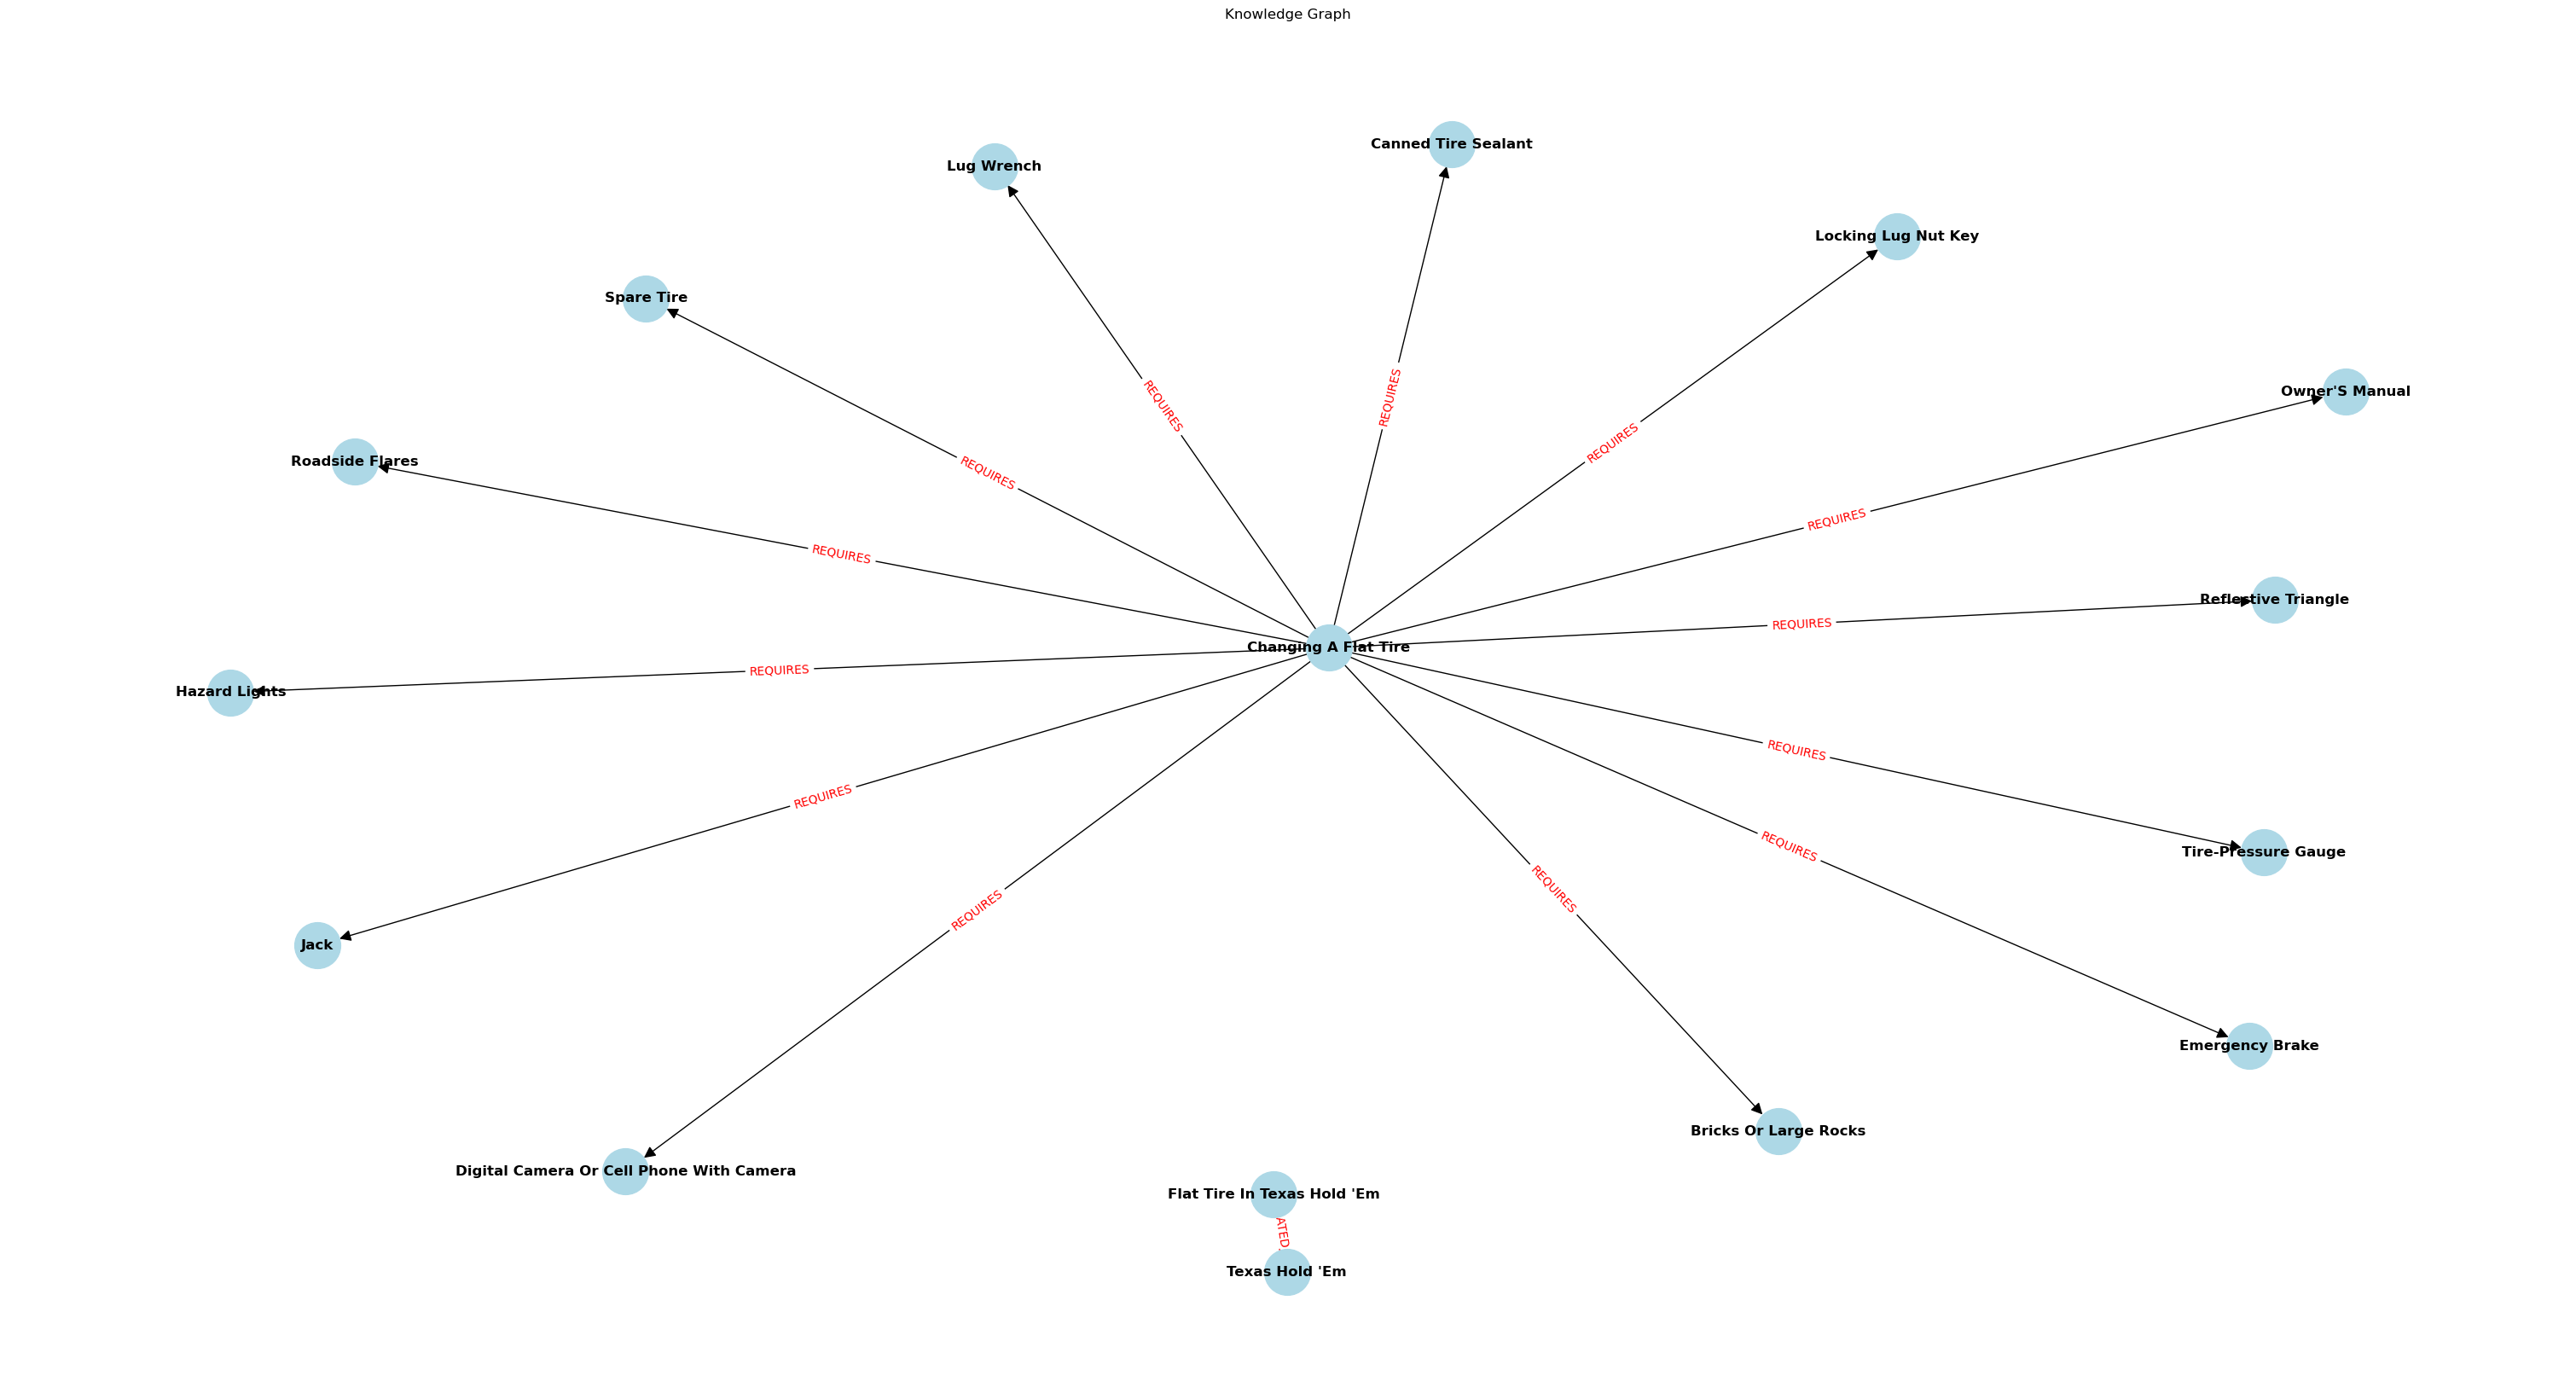

In [13]:
# Create a directed graph
knowledge_graph = nx.DiGraph()

# Add nodes and edges from the DataFrame
for _, row in df.iterrows():
    knowledge_graph.add_edge(row['source'], row['target'], relationship=row['type'])

# Visualize the graph
plt.figure(figsize=(30, 16))
pos = nx.spring_layout(knowledge_graph)
nx.draw(knowledge_graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=1500, arrowsize=20)

# Draw edge labels aligned with the edges
edge_labels = {(source, target): relationship for source, target, relationship in knowledge_graph.edges(data='relationship')}
nx.draw_networkx_edge_labels(knowledge_graph, pos=pos, edge_labels=edge_labels, label_pos=0.5, font_size=10, font_color='red')

plt.title("Knowledge Graph")

# save image to output file
plt.savefig('')

plt.show()